# Exploring Dandiset 001361: A flexible hippocampal population code for experience relative to reward

**AI-generated notebook**  
*This notebook was automatically generated and has not been fully verified. Please use caution and independently verify any code or results before drawing conclusions.*

---

Dandiset 001361: [A flexible hippocampal population code for experience relative to reward](https://dandiarchive.org/dandiset/001361/0.250406.0045)  
*Sosa, Marielena; Plitt, Mark H.; Giocomo, Lisa M. (2025)*

**Citation:**  
Sosa, M.; Plitt, M. H.; Giocomo, L. M. (2025). A flexible hippocampal population code for experience relative to reward (Version 0.250406.0045) [Data set]. DANDI Archive. https://doi.org/10.48324/dandi.001361/0.250406.0045

---

## Overview

This notebook helps users explore and analyze Dandiset 001361, which contains two-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. The data enable study of how hippocampal activity relates to reward and spatial experience. 

**We'll cover:**
- Accessing Dandiset metadata and listing its files
- Loading an NWB file from the DANDI archive
- Summarizing the file's structure and metadata
- Visualizing behavioral data such as position, speed, lick, and reward delivery
- Guidance for further exploration and suggestions for next steps

---

### Required packages

This notebook assumes the following packages are installed:
- `dandi`
- `pynwb`
- `remfile`
- `h5py`
- `matplotlib`
- `pandas`
- `numpy`

(No installation commands are included here; please install these in your environment as needed.)

---

## Dandiset metadata and file listing

Let's connect to the DANDI archive and retrieve some details and a list of files.

In [1]:
from itertools import islice
from dandi.dandiapi import DandiAPIClient

client = DandiAPIClient()
dandiset = client.get_dandiset("001361", "0.250406.0045")

metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}\n")
print("Dandiset description:")
print(metadata['description'])
print("\nFirst 5 assets in Dandiset:")
assets = dandiset.get_assets()
for asset in islice(assets, 5):
    print(f"- {asset.path} (ID: {asset.identifier})")

Dandiset name: A flexible hippocampal population code for experience relative to reward
Dandiset URL: https://dandiarchive.org/dandiset/001361/0.250406.0045

Dandiset description:
2-photon imaging and behavioral data from hippocampal area CA1 during virtual reality navigation in mice. Included in Sosa, Plitt, & Giocomo, "A flexible hippocampal population code for experience relative to reward," Nature Neuroscience.

To reinforce rewarding behaviors, events leading up to and following rewards must be remembered. Hippocampal place cell activity spans spatial and non-spatial episodes, but whether hippocampal activity encodes entire sequences of events relative to reward is unknown. To test this, we performed two-photon imaging of hippocampal CA1 as mice navigated virtual environments with changing hidden reward locations. When the reward moved, a subpopulation of neurons updated their firing fields to the same relative position with respect to reward, constructing behavioral timescale seq

## Selecting and loading an NWB file

We'll explore the following NWB file:

```
sub-m11/sub-m11_ses-03_behavior+ophys.nwb
```

Direct download URL:  
[https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/](https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/)

You can also explore this NWB file on [neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045).

We'll demonstrate how to load and explore this file using PyNWB and remfile for remote access.

In [2]:
import pynwb
import h5py
import remfile

nwb_url = "https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/"
remote_file = remfile.File(nwb_url)
h5_file = h5py.File(remote_file)
io = pynwb.NWBHDF5IO(file=h5_file)
nwb = io.read()

print(f"Session ID: {nwb.session_id}")
print(f"Subject ID: {nwb.subject.subject_id}, Sex: {nwb.subject.sex}, Species: {nwb.subject.species}")
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Experimenter: {nwb.experimenter}")

/home/magland/miniconda3/envs/dev/lib/python3.12/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session ID: 03
Subject ID: m11, Sex: M, Species: Mus musculus
Session Description: processed suite2p data
Session Start Time: 2023-02-23 00:00:00-08:00
Experimenter: ('Mari Sosa',)


## Structure of the NWB file

The NWB file contains a number of behavioral time series and imaging data. Here is a summary tree of the major groups (flattened for clarity):

```
/acquisition/TwoPhotonSeries
/processing/behavior/BehavioralTimeSeries/time_series:
  - Reward, autoreward, environment, lick, position, reward_zone, scanning, speed, teleport, trial number, trial_start
/processing/ophys/Fluorescence/roi_response_series/plane0
/processing/ophys/Deconvolved/roi_response_series/plane0
/processing/ophys/ImageSegmentation/plane_segmentations/PlaneSegmentation
/processing/ophys/Neuropil/roi_response_series/plane0
```

| Behavioral TS | Description                        | Unit      | Shape     |
|---------------|------------------------------------|-----------|-----------|
| Reward        | reward delivery                    | mL        | (69,)     |
| autoreward    | auto reward marker                 | integer   | (20684,)  |
| environment   | VR environment                     | AU        | (20684,)  |
| lick          | Capacitive sensor cumulative lick  | AU        | (20684,)  |
| position      | Position on linear track           | cm        | (20684,)  |
| reward_zone   | Reward zone entry (binary)         | integer   | (20684,)  |
| scanning      | Ophys scanner flag                 | integer   | (20684,)  |
| speed         | Speed over time                    | cm/s      | (20684,)  |
| teleport      | Trial end/teleport marker          | integer   | (20684,)  |
| trial number  | Trial ID                           | integer   | (20684,)  |
| trial_start   | Trial start event                  | integer   | (20684,)  |

Fluorescence/Deconvolved/Neuropil are all per-ROI timeseries datasets for calcium imaging data.

ROI segmentation table (first 5 rows):

| id | pixel_mask | iscell | planeIdx |
|----|------------|--------|----------|
| 0  | [...]      | [...]  | 0        |
| 1  | [...]      | [...]  | 0        |
| 2  | [...]      | [...]  | 0        |
| 3  | [...]      | [...]  | 0        |
| 4  | [...]      | [...]  | 0        |

---

## Loading and visualizing behavioral data

We'll load and plot a few key behavioral signals—position, speed, and lick events—over the first 10,000 timepoints for clarity.

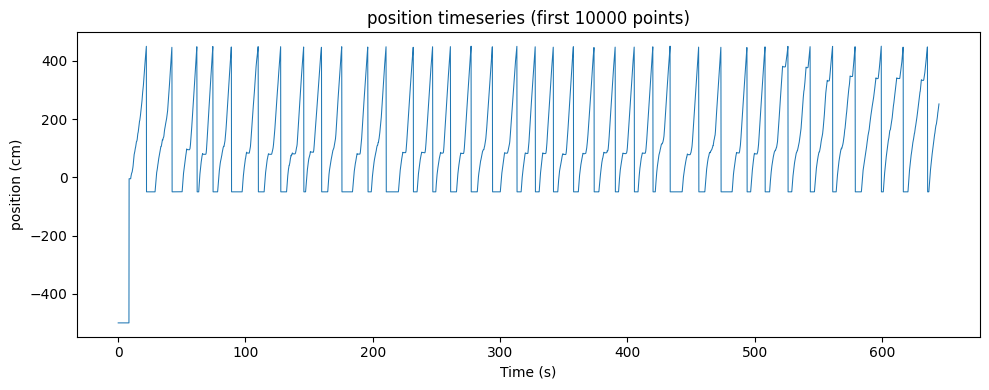

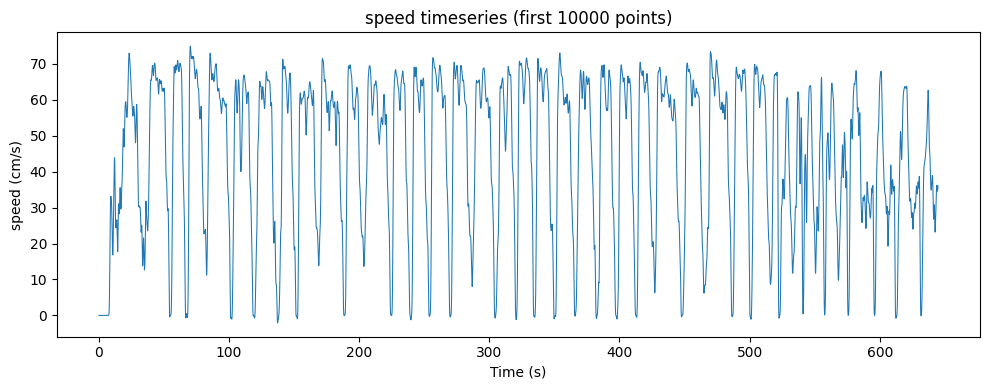

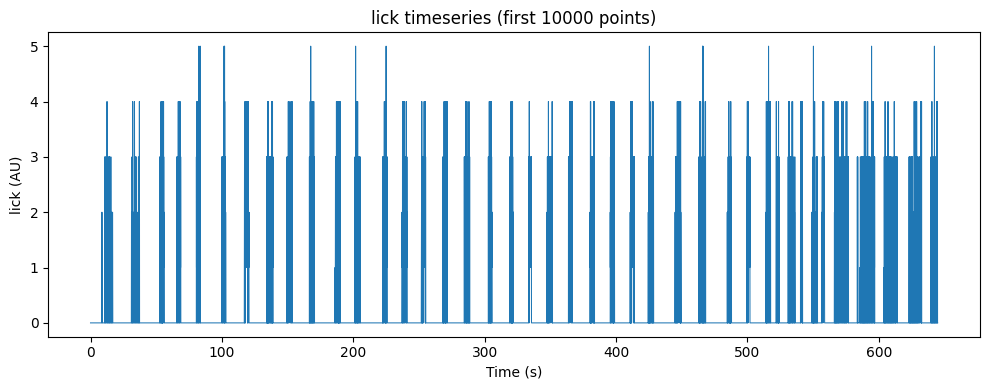

In [3]:
import matplotlib.pyplot as plt
import numpy as np

# Helper to access behavioral time series
behavior = nwb.processing["behavior"].data_interfaces["BehavioralTimeSeries"].time_series

def plot_behavior_timeseries(ts_key, ylabel, max_points=10000):
    ts = behavior[ts_key]
    data = ts.data[:max_points]
    t = ts.timestamps[:max_points]
    plt.figure(figsize=(10, 4))
    plt.plot(t, data, lw=0.75)
    plt.xlabel("Time (s)")
    plt.ylabel(ylabel)
    plt.title(f"{ts_key} timeseries (first {len(data)} points)")
    plt.tight_layout()
    plt.show()

plot_behavior_timeseries("position", "position (cm)")
plot_behavior_timeseries("speed", "speed (cm/s)")
plot_behavior_timeseries("lick", "lick (AU)")

### Reward delivery times

Now, let's visualize when rewards were delivered during the session.

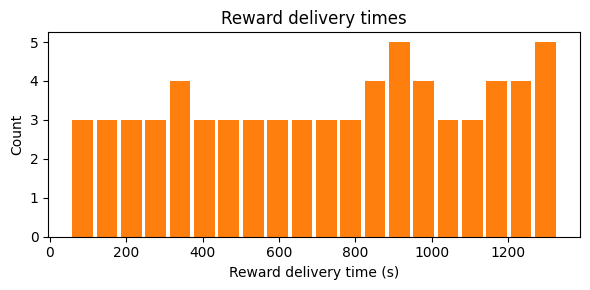

In [4]:
reward_ts = behavior["Reward"].timestamps[:]
plt.figure(figsize=(6, 3))
plt.hist(reward_ts, bins=20, color="tab:orange", rwidth=0.85)
plt.xlabel("Reward delivery time (s)")
plt.ylabel("Count")
plt.title("Reward delivery times")
plt.tight_layout()
plt.show()

## Guidance for further analysis

This notebook demonstrated:
- How to access Dandiset and NWB metadata programmatically
- Listing assets and selecting a file
- How to load the NWB file remotely and explore session structure
- How to visualize behavioral timeseries signals and reward events

**Suggestions for further analysis:**
- Explore imaging datasets (e.g., calcium fluorescence or deconvolved traces)
- Analyze ROI segmentation and cell properties
- Align events (licks, rewards, etc.) with neural signal features
- Study speed and position in relation to reward zone or trial number
- Aggregate/compare trials across sessions or subjects

For more, see the [DANDI Dandiset landing page](https://dandiarchive.org/dandiset/001361/0.250406.0045) or experiment interactively using [Neurosift](https://neurosift.app/nwb?url=https://api.dandiarchive.org/api/assets/d77ea78a-8978-461d-9d11-3c5cef860d82/download/&dandisetId=001361&dandisetVersion=0.250406.0045).

---

*Remember: This notebook is AI-generated and not fully verified. Review all steps, and adapt code and plots to your scientific needs!*